## Convolution 
It's about converting the image into another image using a kernel matrix , $ output = function (kernel , input)$  
It's used to apply filters on images  
**Note  :**
to preserve  image shape , we first apply padding

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

Kernels = {"edge" : np.array([[-1, -1 , -1] , [-1 , 8 , -1] , [-1 , -1 , -1]]) ,
           "sharp" : np.array([[0 ,-1 , 0],[-1 , 5, -1],[ 0, -1, 0]]),
           "sobel_vertical" : np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]) , 
           "idk" : np.array([[-2 , -1 , 0] , [-1 , 1 , 1] , [0, 1, 2]]) , 
           "gaussian_blur" : np.array([[1 , 2 , 1] , [2 , 4 , 2] , [1 , 2 , 1]])*(1/16),
           "blur" : np.ones(shape=(5,5))*(1/16)}



### cv2 filter2D conv 
Built-in function to apply convulution

(480, 512) (480, 512)


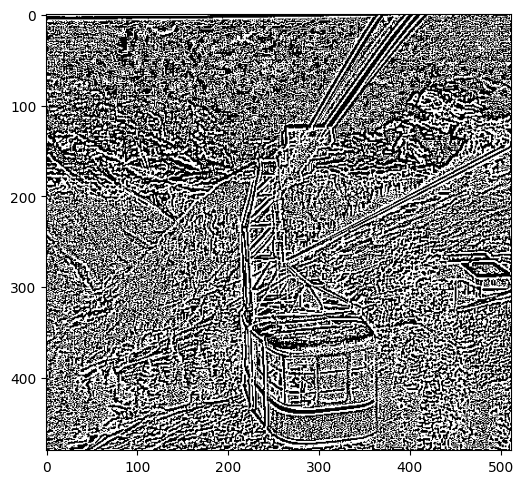

In [3]:
gray_img =cv2.imread("cablecar.bmp" , cv2.IMREAD_GRAYSCALE)
img_conv = cv2.filter2D(src=gray_img, ddepth= cv2.CV_64F, kernel=Kernels["edge"])
print(img_conv.shape ,gray_img.shape)
cv2.imshow(" filter cv2",img_conv)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.figure(figsize=(6, 6))

plt.imshow( np.uint64(img_conv ), cmap = "gray" , )


### applying padding incase of 3 * 3 kernel
new height = old height + ( kernel_height - 1 / 2 )  
if you dont use padded image , result will have H -2 and W - 2 as shape

(480, 512)
(480, 512)


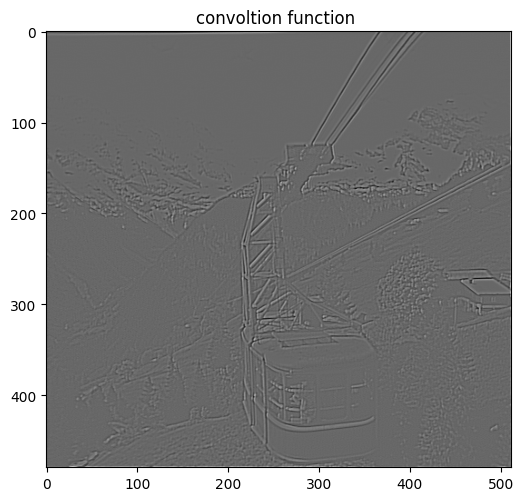

In [4]:
def padding(image , kernel):
    p = int(kernel.shape[0]/2)
    pad_img = np.zeros((image.shape[0]+2*p, image.shape[1]+2*p))
    pad_img[p:-p, p:-p] = image
    return pad_img
    

def convolution(pad_img, kernel):
    p = int(kernel.shape[0]/2)
    pheight, pwidth = pad_img.shape
    img_conv = np.zeros(pad_img.shape)
    for i in range(p, pheight-p):
        for j in range(p, pwidth-p):
            roi = pad_img[i-p:i+p+1, j-p:j+p+1]
            img_conv[i, j] = np.sum(kernel * roi)
    img_conv = img_conv[p:-p, p:-p]
    return img_conv

img_convx = convolution(padding(gray_img , Kernels["edge"])  , Kernels["edge"])
print(img_convx.shape)
print(gray_img.shape)


cv2.imshow("our function conv" , img_convx)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.figure(figsize=(6,6))
plt.title("convoltion function " )
plt.imshow(img_convx, cmap="gray")
plt.show()


In [5]:
img_convx = convolution(padding(gray_img , Kernels["edge"]) , Kernels["edge"])
print(img_convx.shape ,gray_img.shape)
cv2.imshow("conv cv2",img_convx)
cv2.waitKey(0)
cv2.destroyAllWindows()

(480, 512) (480, 512)


### Exo 3 : 
- resize image to clozest size that is divisible par 4 , pour avoir 16 square blocks de la meme dimension  
- appliquer un decoupage logique sur l'image (manipulation d'indice seulement)  
- dans une boucle chaque bloc fait sa convolution  
- on aura a la fin toute l'image convuled

(480, 512)


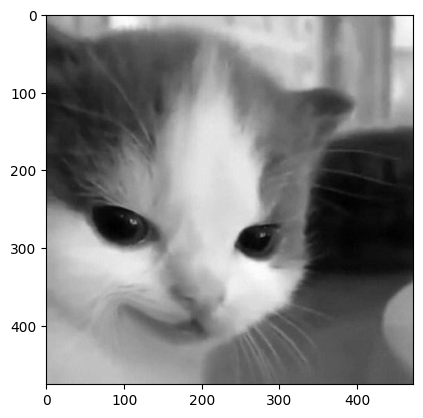

In [6]:


def my_resize(image):
    height , width =image.shape[:2]
    newheight = height - (height % 4)
    newwidth = width - (width % 4)
    return cv2.resize(image , (newwidth , newheight))


def conv_par_bloc(image , kernel):
    resized = my_resize(image)
    division = lambda a : a/4
    bloc_height , bloc_width =  map(int ,list(map(division , resized.shape[:2])))
    result = np.empty_like(resized)
   

    for row in range(4):
        rowstart = row * bloc_height
        rowend = rowstart + (bloc_height - 1)
        
        for col in range(4):
            colstart = bloc_width * col
            colend = colstart + (bloc_width - 1)
            # print([rowstart , rowend] , [colstart , colend])
            blocimage = image[rowstart : rowend+1, colstart : colend+1]
            # cv2.imshow("bloc" ,blocimage)
            # cv2.waitKey(0)
            # cv2.destroyAllWindows()
            padbloc = padding(blocimage , kernel)
            convbloc = convolution(padbloc ,kernel)
            # convbloc = cv2.filter2D(src=blocimage, ddepth= cv2.CV_64F, kernel=kernel)
            result[rowstart : rowend+1, colstart : colend+1] = convbloc
            plt.imshow(result , cmap="gray")
            # print(blocimage.shape)
    return result


    
image = cv2.imread("cat evil hehe.jpg" , cv2.IMREAD_GRAYSCALE)

cv2.imshow("lllll" , image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(image , cmap="gray")
print(gray_img.shape)


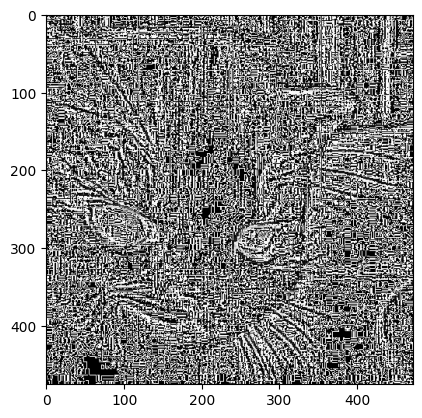

In [13]:
convbloc = conv_par_bloc(image, Kernels["edge"])
plt.imshow(convbloc , cmap=	"gray")

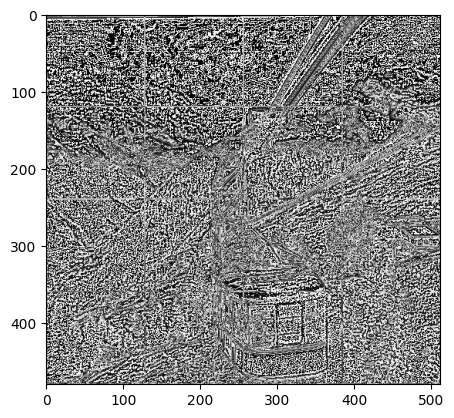

In [11]:
convbloc = conv_par_bloc(gray_img, Kernels["edge"])
cv2.imshow("edge filter cablcar",convbloc)
cv2.waitKey(0)
cv2.destroyAllWindows()

## convert RGB to gray 
this script does convert height width channels image to HW image with gray scale from 0 to 255 

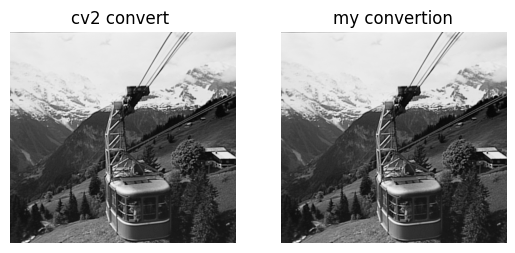

In [70]:
# Gray=0.299×R+0.587×G+0.114×B


def togray(image_name):
    image = plt.imread(image_name)
    dtype = image.dtype
    output = np.empty(shape=(image.shape[0] , image.shape[1]) , dtype=dtype)
    for row in  range(image.shape[0]) : 
        for col in range(image.shape[1]) : 
            output[row][col] = 0.299 * image[row][col][0] + 0.587 * image[row][col][1] + 0.114 * image[row][col][2]
                
                
    return output
                
                
                
                
                
img = plt.imread("cablecar.bmp")

figure, plots = plt.subplots(1, 2)
plots[0].imshow(cv2.cvtColor(img , cv2.COLOR_RGB2GRAY) , cmap="gray")
plots[0].axis('off')
plots[0].set_title('cv2 convert ')
plots[1].imshow(togray("cablecar.bmp"), cmap='gray')
plots[1].axis('off')
plots[1].set_title('my convertion')
plt.show()


